In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  

### Feature Selection 

it is the process where you automatically or manually select 
those features which contribute most to your prediction variable or output in which you are interested in.

· Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

· Improves Accuracy: Less misleading data means modeling accuracy improves.

· Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold

## 1. Filtering Method- Constant, Quasi Constant and Duplicate Feature Removal

In [3]:
data = pd.read_csv("train.csv", nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
data.shape

(20000, 371)

In [5]:
X =data.drop("TARGET", axis=1)
y =data["TARGET"]

X.shape , y.shape

((20000, 370), (20000,))

In [6]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Quasi feature removal

In [7]:
constant_filter =VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [8]:
constant_filter.get_support().sum()

291

In [9]:
constant_list =[not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [10]:
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [11]:
X_train_filter =constant_filter.transform(X_train)
X_test_filter =constant_filter.transform(X_test)

In [12]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((16000, 291), (4000, 291), (16000, 370))

### Quasi constant feature removal

In [13]:
quasi_constant_filter =VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [14]:
quasi_constant_filter.get_support().sum()

245

In [15]:
370 -245

125

In [16]:
X_train_quasi_filter =quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter =quasi_constant_filter.transform(X_test_filter)

In [17]:
X_train_quasi_filter.shape, X_train_quasi_filter.shape, X_train_filter.shape, X_train.shape

((16000, 245), (16000, 245), (16000, 291), (16000, 370))

### Remove Duplicate Feature

In [18]:
X_train_T =X_train_quasi_filter.T
X_test_T =X_test_quasi_filter.T

In [19]:
type(X_train_T)

numpy.ndarray

In [20]:
X_train_T =pd.DataFrame(X_train_T)
X_test_T =pd.DataFrame(X_test_T)

In [21]:
X_train_T.shape, X_test_T.shape

((245, 16000), (245, 4000))

In [22]:
X_train_T.head()

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,17282.0,38270.0,31526.0,38737.0,16469.0,4464.0,302.00,22890.00,12211.0,11949.0,...,31516.0,1337.0,37006.0,19809.0,10783.00,38333.0,26389.0,2025.0,17327.0,25406.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.00,2.0,2.0,...,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.0
2,24.0,23.0,45.0,29.0,23.0,23.0,31.00,31.00,24.0,28.0,...,26.0,36.0,23.0,44.0,23.00,25.0,34.0,43.0,23.0,23.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,97.59,1005.54,0.0,0.0,...,0.0,0.0,0.0,0.0,53.85,0.0,0.0,0.0,0.0,0.0


In [23]:
X_train_T.duplicated().sum()

18

In [24]:
duplicated =X_train_T.duplicated()
duplicated

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
215    False
216    False
217    False
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [25]:
feature_keep =[not index for index in duplicated]

In [26]:
X_train_unique =X_train_T[feature_keep].T
X_test_unique =X_test_T[feature_keep].T

In [27]:
X_train_unique.head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,17282.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63200.700000
1,38270.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88640.610000
2,31526.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96314.160000
3,38737.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117568.020000
4,16469.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [28]:
X_train_unique.shape , X_train.shape

((16000, 227), (16000, 370))

### Buil ML model and compare the Performance

In [29]:
def randomforest(X_train, X_test, y_train, y_test):
    rf= RandomForestClassifier(n_estimators=100 , n_jobs=-1, random_state=0)
    rf.fit(X_train, y_train)
    y_pred =rf.predict(X_test)
    print("Accuracy on test set:")
    print(accuracy_score(y_test, y_pred))

In [30]:
%%time
randomforest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy on test set:
0.95875
Wall time: 2.97 s


In [31]:
%%time
randomforest(X_train, X_test, y_train, y_test)

Accuracy on test set:
0.9585
Wall time: 3.25 s


## 2. Feature Selection with Autocorrelation

### Pearson's correlation coefficient 

it is the test statistics that measures the statistical relationship, or association, between two continuous variables.
It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.

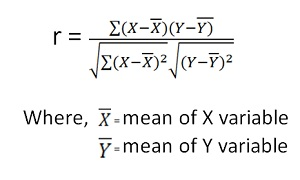

In [32]:
from IPython.display import Image
img = 'Karl-Pearson-final.jpg'
Image(filename=img)

In [33]:
corrmat =X_train_unique.corr()

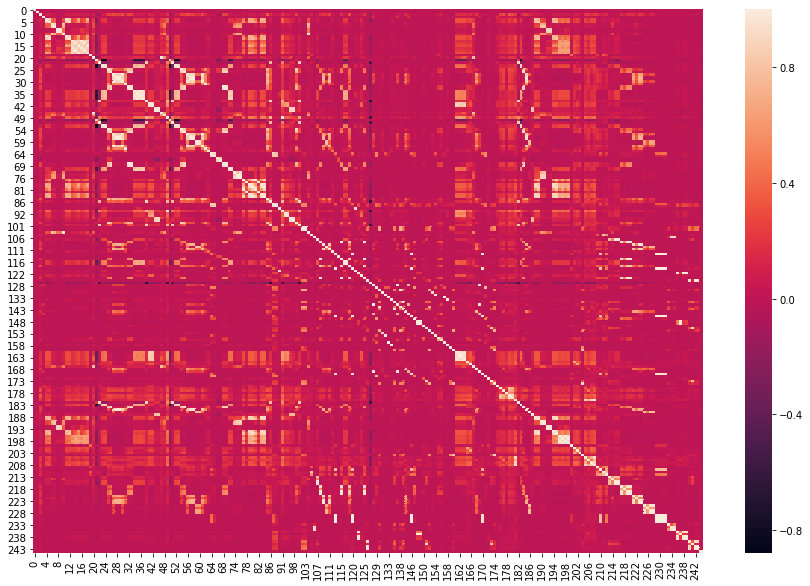

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(corrmat);

In [35]:
corrmat.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            235, 236, 237, 238, 239, 240, 241, 242, 243, 244],
           dtype='int64', length=227)

In [36]:
def get_correlation(data, threshold):
    corr_col= set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [37]:
corr_features =get_correlation(X_train_unique, .85)
corr_features

{5,
 7,
 9,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 76,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 91,
 93,
 95,
 98,
 100,
 101,
 103,
 104,
 111,
 115,
 117,
 120,
 121,
 125,
 136,
 138,
 143,
 146,
 149,
 153,
 154,
 157,
 158,
 161,
 162,
 163,
 164,
 169,
 170,
 173,
 180,
 182,
 183,
 184,
 185,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 204,
 205,
 207,
 208,
 215,
 216,
 217,
 219,
 220,
 221,
 223,
 224,
 227,
 228,
 229,
 230,
 231,
 232,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243}

In [38]:
xtrain_uncorr = X_train_unique.drop(labels =corr_features, axis=1)
xtest_uncorr = X_test_unique.drop(labels =corr_features, axis=1)

In [39]:
xtrain_uncorr.shape, xtrain_uncorr.shape

((16000, 103), (16000, 103))

In [40]:
%%time
randomforest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy on test set:
0.95875
Wall time: 3.33 s


### Feature Grouping and Feature Importance

In [41]:
corrmat

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,...,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
1,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,...,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
2,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,...,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
3,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,...,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
4,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,...,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656
5,-0.001697,0.009232,0.109140,0.024905,0.888789,1.000000,0.363680,0.384820,0.017671,0.030060,...,0.000328,0.010860,-0.001706,0.012963,0.013553,0.000871,0.007096,-0.001672,-0.001844,0.002257
6,-0.015882,0.001638,0.048524,0.014513,0.381632,0.363680,1.000000,0.908158,0.030397,0.036359,...,-0.000485,0.006351,-0.000301,0.002590,0.003867,-0.000818,-0.000515,-0.000779,-0.000839,0.004448
7,-0.019807,0.001746,0.055708,0.013857,0.341266,0.384820,0.908158,1.000000,0.047667,0.056456,...,-0.000514,0.006336,-0.000318,0.002476,0.003707,-0.000866,-0.000545,-0.000825,-0.000888,0.002427
8,0.000956,0.000614,0.004040,-0.000613,0.012927,0.017671,0.030397,0.047667,1.000000,0.988256,...,-0.000184,-0.000197,-0.000114,-0.000185,-0.000189,-0.000309,-0.000195,-0.000295,-0.000317,-0.000739
9,-0.000588,0.000695,0.005796,-0.000691,0.019674,0.030060,0.036359,0.056456,0.988256,1.000000,...,-0.000207,-0.000222,-0.000128,-0.000208,-0.000213,-0.000349,-0.000220,-0.000332,-0.000358,-0.000811


In [42]:
corrdata = corrmat.abs().stack()
corrdata

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
     5      0.001697
     6      0.015882
     7      0.019807
     8      0.000956
     9      0.000588
     10     0.012443
     11     0.010319
     12     0.005268
     13     0.017605
     14     0.016960
     15     0.018040
     16     0.017400
     17     0.016745
     18     0.015206
     19     0.000103
     20     0.001198
     21     0.006814
     22     0.002037
     23     0.010356
     24     0.012021
     25     0.001732
     26     0.001138
     27     0.004836
     28     0.006480
     29     0.005811
              ...   
244  215    0.000338
     216    0.000244
     217    0.017276
     218    0.006644
     219    0.018092
     220    0.017579
     221    0.014736
     222    0.002052
     223    0.014980
     224    0.014628
     225    0.014567
     226    0.005688
     227    0.015351
     228    0.014485
     229    0.013197
     230    0.012842
     231    0

In [43]:
corrdata =corrdata.sort_values(ascending=False)
corrdata

29   58     1.000000e+00
58   29     1.000000e+00
134  158    1.000000e+00
158  134    1.000000e+00
182  182    1.000000e+00
181  181    1.000000e+00
159  159    1.000000e+00
160  160    1.000000e+00
161  161    1.000000e+00
162  162    1.000000e+00
163  163    1.000000e+00
164  164    1.000000e+00
165  165    1.000000e+00
166  166    1.000000e+00
167  167    1.000000e+00
168  168    1.000000e+00
169  169    1.000000e+00
170  170    1.000000e+00
171  171    1.000000e+00
158  158    1.000000e+00
173  173    1.000000e+00
174  174    1.000000e+00
175  175    1.000000e+00
176  176    1.000000e+00
177  177    1.000000e+00
183  183    1.000000e+00
178  178    1.000000e+00
179  179    1.000000e+00
180  180    1.000000e+00
172  172    1.000000e+00
                ...     
113  60     8.925381e-06
60   113    8.925381e-06
82   193    8.892757e-06
193  82     8.892757e-06
230  110    8.848510e-06
110  230    8.848510e-06
235  15     8.707147e-06
15   235    8.707147e-06
186  243    7.715459e-06


In [44]:
corrdata =corrdata[0.85<corrdata]
corrdata =corrdata[corrdata<1]
corrdata

143  135    1.000000
135  143    1.000000
136  128    1.000000
128  136    1.000000
31   62     1.000000
62   31     1.000000
20   47     1.000000
47   20     1.000000
52   23     1.000000
23   52     1.000000
53   24     1.000000
24   53     1.000000
33   69     1.000000
69   33     1.000000
157  133    1.000000
133  157    1.000000
237  149    1.000000
149  237    1.000000
154  132    1.000000
132  154    1.000000
146  230    0.999997
230  146    0.999997
238  122    0.999945
122  238    0.999945
148  149    0.999929
149  148    0.999929
237  148    0.999929
148  237    0.999929
231  232    0.999892
232  231    0.999892
              ...   
183  52     0.860163
52   183    0.860163
183  23     0.860163
23   183    0.860163
79   195    0.859806
195  79     0.859806
8    193    0.859270
193  8      0.859270
29   61     0.858830
61   29     0.858830
     58     0.858830
58   61     0.858830
84   77     0.858529
77   84     0.858529
83   189    0.858484
189  83     0.858484
84   194    0

In [45]:
corrdata =pd.DataFrame(corrdata).reset_index()
corrdata.columns =["Features1","Features2","Corr_value"]

In [46]:
corrdata.head()

,Features1,Features2,Corr_value
0,143,135,1.0
1,135,143,1.0
2,136,128,1.0
3,128,136,1.0
4,31,62,1.0


In [47]:
grouped_feature_list =[]
correlated_groups_list =[]
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block =corrdata[corrdata.Features1 == feature]
        grouped_feature_list =grouped_feature_list + list(correlated_block.Features2.unique()) +[feature]
        correlated_groups_list.append(correlated_block)

In [48]:
grouped_feature_list

[135,
 143,
 128,
 169,
 136,
 62,
 31,
 47,
 20,
 23,
 24,
 53,
 21,
 183,
 52,
 69,
 32,
 68,
 26,
 55,
 184,
 33,
 133,
 157,
 149,
 148,
 237,
 132,
 154,
 230,
 229,
 231,
 232,
 113,
 120,
 170,
 146,
 122,
 239,
 236,
 238,
 78,
 82,
 115,
 219,
 125,
 220,
 217,
 108,
 197,
 196,
 198,
 199,
 208,
 205,
 207,
 181,
 14,
 16,
 13,
 17,
 243,
 126,
 240,
 242,
 57,
 58,
 29,
 185,
 27,
 30,
 61,
 28,
 22,
 182,
 51,
 46,
 98,
 95,
 44,
 81,
 80,
 84,
 77,
 223,
 224,
 221,
 111,
 109,
 8,
 193,
 192,
 9,
 228,
 225,
 227,
 117,
 116,
 49,
 91,
 25,
 100,
 54,
 75,
 74,
 191,
 190,
 76,
 35,
 34,
 36,
 72,
 38,
 15,
 16,
 13,
 18,
 107,
 216,
 215,
 61,
 27,
 30,
 56,
 163,
 161,
 164,
 41,
 162,
 103,
 102,
 79,
 188,
 84,
 194,
 80,
 189,
 83,
 72,
 35,
 70,
 60,
 59,
 189,
 80,
 194,
 84,
 188,
 79,
 195,
 234,
 106,
 235,
 104,
 10,
 179,
 180,
 151,
 241,
 41,
 161,
 164,
 42,
 5,
 11,
 12,
 11,
 5,
 4,
 92,
 93,
 121,
 89,
 87,
 88,
 204,
 174,
 21,
 50,
 7,
 6,
 65,
 87,
 6

In [49]:
for group in correlated_groups_list:
    print(group)

   Features1  Features2  Corr_value
0        143        135         1.0
     Features1  Features2  Corr_value
2          136        128    1.000000
197        136        169    0.959468
   Features1  Features2  Corr_value
4         31         62         1.0
   Features1  Features2  Corr_value
6         20         47         1.0
     Features1  Features2  Corr_value
8           52         23    1.000000
297         52         24    0.927683
299         52         53    0.927683
448         52         21    0.877297
505         52        183    0.860163
     Features1  Features2  Corr_value
12          33         69    1.000000
224         33         32    0.947113
228         33         68    0.946571
322         33         26    0.917665
337         33         55    0.914178
422         33        184    0.884383
    Features1  Features2  Corr_value
14        157        133         1.0
    Features1  Features2  Corr_value
16        237        149    1.000000
26        237        148    

In [50]:
len(correlated_groups_list) , len(grouped_feature_list)

(56, 193)

In [51]:
X_train.shape,  xtrain_uncorr.shape

((16000, 370), (16000, 103))

### Feature imporatnce based on Tree classifier

In [52]:
important_features = []
for group in correlated_groups_list:
    features = list(group.Features1.unique()) + list(group.Features2.unique())
    RF = RandomForestClassifier(n_estimators=100, random_state=0)
    RF.fit(X_train_unique[features], y_train )
    
    importance =pd.concat([pd.Series(features), pd.Series(RF.feature_importances_)], axis=1)
    importance.columns =["features","importance"]
    importance.sort_values(by ="importance", ascending =False, inplace=True)
    feat =importance.iloc[0]
    important_features.append(feat)


In [53]:
important_features

[features      135.00
 importance      0.51
 Name: 1, dtype: float64, features      128.000000
 importance      0.563757
 Name: 1, dtype: float64, features      62.00
 importance     0.51
 Name: 1, dtype: float64, features      47.00
 importance     0.51
 Name: 1, dtype: float64, features      183.000000
 importance      0.285817
 Name: 5, dtype: float64, features      184.00000
 importance      0.34728
 Name: 6, dtype: float64, features      157.000000
 importance      0.523077
 Name: 0, dtype: float64, features      148.000000
 importance      0.624498
 Name: 2, dtype: float64, features      132.000000
 importance      0.565217
 Name: 1, dtype: float64, features      120.000000
 importance      0.749683
 Name: 6, dtype: float64, features      122.000000
 importance      0.343434
 Name: 1, dtype: float64, features      82.000000
 importance     0.518827
 Name: 0, dtype: float64, features      125.000000
 importance      0.940524
 Name: 3, dtype: float64, features      197.000000
 impo

In [54]:
important_features =pd.DataFrame(important_features)

In [55]:
important_features.reset_index(inplace =True, drop =True)

In [56]:
important_features.head()

,features,importance
0,135.0,0.510000
1,128.0,0.563757
2,62.0,0.510000
3,47.0,0.510000
4,183.0,0.285817


In [57]:
features_to_consider =set(important_features["features"])
features_to_discard = set(corr_features) - set(features_to_consider)

In [58]:
features_to_discard =list(features_to_discard)

In [59]:
X_train_group_uncorr = X_train_unique.drop(labels =features_to_discard, axis=1)
X_test_group_uncorr = X_test_unique.drop(labels =features_to_discard, axis=1)

In [60]:
X_train_group_uncorr.shape, X_test_group_uncorr.shape

((16000, 140), (4000, 140))

In [61]:
%%time
randomforest(X_train_group_uncorr, X_test_group_uncorr, y_train, y_test)

Accuracy on test set:
0.95775
Wall time: 2.66 s


In [62]:
%%time
randomforest(X_train, X_test, y_train, y_test)

Accuracy on test set:
0.9585
Wall time: 3.24 s


In [63]:
%%time
randomforest(xtrain_uncorr, xtest_uncorr, y_train, y_test)

Accuracy on test set:
0.95875
Wall time: 2.26 s


### Feature Grouping & Feature Importance

In [64]:
corrmat

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,1.000000,-0.025277,-0.001942,0.003594,0.004054,-0.001697,-0.015882,-0.019807,0.000956,-0.000588,...,-0.001337,0.002051,-0.008500,0.006554,0.005907,0.008825,-0.009174,0.012031,0.012128,0.006612
1,-0.025277,1.000000,-0.007647,0.001819,0.008981,0.009232,0.001638,0.001746,0.000614,0.000695,...,0.000544,0.000586,0.000337,0.000550,0.000563,0.000922,0.000598,0.000875,0.000942,0.000415
2,-0.001942,-0.007647,1.000000,0.030919,0.106245,0.109140,0.048524,0.055708,0.004040,0.005796,...,0.025522,0.020168,0.011550,0.019325,0.019527,0.041321,0.016172,0.043577,0.044281,-0.000810
3,0.003594,0.001819,0.030919,1.000000,0.029418,0.024905,0.014513,0.013857,-0.000613,-0.000691,...,0.014032,-0.000583,-0.000337,-0.000548,-0.000561,0.000541,-0.000577,0.000231,0.000235,0.000966
4,0.004054,0.008981,0.106245,0.029418,1.000000,0.888789,0.381632,0.341266,0.012927,0.019674,...,0.002328,0.016743,-0.001662,0.020509,0.021276,-0.001905,-0.000635,-0.002552,-0.002736,0.003656
5,-0.001697,0.009232,0.109140,0.024905,0.888789,1.000000,0.363680,0.384820,0.017671,0.030060,...,0.000328,0.010860,-0.001706,0.012963,0.013553,0.000871,0.007096,-0.001672,-0.001844,0.002257
6,-0.015882,0.001638,0.048524,0.014513,0.381632,0.363680,1.000000,0.908158,0.030397,0.036359,...,-0.000485,0.006351,-0.000301,0.002590,0.003867,-0.000818,-0.000515,-0.000779,-0.000839,0.004448
7,-0.019807,0.001746,0.055708,0.013857,0.341266,0.384820,0.908158,1.000000,0.047667,0.056456,...,-0.000514,0.006336,-0.000318,0.002476,0.003707,-0.000866,-0.000545,-0.000825,-0.000888,0.002427
8,0.000956,0.000614,0.004040,-0.000613,0.012927,0.017671,0.030397,0.047667,1.000000,0.988256,...,-0.000184,-0.000197,-0.000114,-0.000185,-0.000189,-0.000309,-0.000195,-0.000295,-0.000317,-0.000739
9,-0.000588,0.000695,0.005796,-0.000691,0.019674,0.030060,0.036359,0.056456,0.988256,1.000000,...,-0.000207,-0.000222,-0.000128,-0.000208,-0.000213,-0.000349,-0.000220,-0.000332,-0.000358,-0.000811


In [65]:
corrdata =corrmat.abs().stack()
corrdata

0    0      1.000000
     1      0.025277
     2      0.001942
     3      0.003594
     4      0.004054
     5      0.001697
     6      0.015882
     7      0.019807
     8      0.000956
     9      0.000588
     10     0.012443
     11     0.010319
     12     0.005268
     13     0.017605
     14     0.016960
     15     0.018040
     16     0.017400
     17     0.016745
     18     0.015206
     19     0.000103
     20     0.001198
     21     0.006814
     22     0.002037
     23     0.010356
     24     0.012021
     25     0.001732
     26     0.001138
     27     0.004836
     28     0.006480
     29     0.005811
              ...   
244  215    0.000338
     216    0.000244
     217    0.017276
     218    0.006644
     219    0.018092
     220    0.017579
     221    0.014736
     222    0.002052
     223    0.014980
     224    0.014628
     225    0.014567
     226    0.005688
     227    0.015351
     228    0.014485
     229    0.013197
     230    0.012842
     231    0

In [66]:
corrdata =corrdata.sort_values(ascending=False)
corrdata

29   58     1.000000e+00
58   29     1.000000e+00
134  158    1.000000e+00
158  134    1.000000e+00
182  182    1.000000e+00
181  181    1.000000e+00
159  159    1.000000e+00
160  160    1.000000e+00
161  161    1.000000e+00
162  162    1.000000e+00
163  163    1.000000e+00
164  164    1.000000e+00
165  165    1.000000e+00
166  166    1.000000e+00
167  167    1.000000e+00
168  168    1.000000e+00
169  169    1.000000e+00
170  170    1.000000e+00
171  171    1.000000e+00
158  158    1.000000e+00
173  173    1.000000e+00
174  174    1.000000e+00
175  175    1.000000e+00
176  176    1.000000e+00
177  177    1.000000e+00
183  183    1.000000e+00
178  178    1.000000e+00
179  179    1.000000e+00
180  180    1.000000e+00
172  172    1.000000e+00
                ...     
113  60     8.925381e-06
60   113    8.925381e-06
82   193    8.892757e-06
193  82     8.892757e-06
230  110    8.848510e-06
110  230    8.848510e-06
235  15     8.707147e-06
15   235    8.707147e-06
186  243    7.715459e-06


In [67]:
corrdata =corrdata[corrdata>0.85]
corrdata =corrdata[corrdata<1]
corrdata

143  135    1.000000
135  143    1.000000
136  128    1.000000
128  136    1.000000
31   62     1.000000
62   31     1.000000
20   47     1.000000
47   20     1.000000
52   23     1.000000
23   52     1.000000
53   24     1.000000
24   53     1.000000
33   69     1.000000
69   33     1.000000
157  133    1.000000
133  157    1.000000
237  149    1.000000
149  237    1.000000
154  132    1.000000
132  154    1.000000
146  230    0.999997
230  146    0.999997
238  122    0.999945
122  238    0.999945
148  149    0.999929
149  148    0.999929
237  148    0.999929
148  237    0.999929
231  232    0.999892
232  231    0.999892
              ...   
183  52     0.860163
52   183    0.860163
183  23     0.860163
23   183    0.860163
79   195    0.859806
195  79     0.859806
8    193    0.859270
193  8      0.859270
29   61     0.858830
61   29     0.858830
     58     0.858830
58   61     0.858830
84   77     0.858529
77   84     0.858529
83   189    0.858484
189  83     0.858484
84   194    0

In [68]:
corrdata =pd.DataFrame(corrdata).reset_index()
corrdata.columns =["feature1","feature2", "corr_val"]

In [69]:
corrdata.head()

,feature1,feature2,corr_val
0,143,135,1.0
1,135,143,1.0
2,136,128,1.0
3,128,136,1.0
4,31,62,1.0


In [70]:
corrdata.shape

(534, 3)

In [71]:
grouped_feature_list =[]
correlated_groups_list =[]
for feature in corrdata.feature1.unique():
    if feature not in grouped_feature_list:
        correlated_block =corrdata[corrdata.feature1 == feature]
        grouped_feature_list =grouped_feature_list + list(correlated_block.feature2.unique()) +[feature]
        correlated_groups_list.append(correlated_block)

In [72]:
print(grouped_feature_list)

[135, 143, 128, 169, 136, 62, 31, 47, 20, 23, 24, 53, 21, 183, 52, 69, 32, 68, 26, 55, 184, 33, 133, 157, 149, 148, 237, 132, 154, 230, 229, 231, 232, 113, 120, 170, 146, 122, 239, 236, 238, 78, 82, 115, 219, 125, 220, 217, 108, 197, 196, 198, 199, 208, 205, 207, 181, 14, 16, 13, 17, 243, 126, 240, 242, 57, 58, 29, 185, 27, 30, 61, 28, 22, 182, 51, 46, 98, 95, 44, 81, 80, 84, 77, 223, 224, 221, 111, 109, 8, 193, 192, 9, 228, 225, 227, 117, 116, 49, 91, 25, 100, 54, 75, 74, 191, 190, 76, 35, 34, 36, 72, 38, 15, 16, 13, 18, 107, 216, 215, 61, 27, 30, 56, 163, 161, 164, 41, 162, 103, 102, 79, 188, 84, 194, 80, 189, 83, 72, 35, 70, 60, 59, 189, 80, 194, 84, 188, 79, 195, 234, 106, 235, 104, 10, 179, 180, 151, 241, 41, 161, 164, 42, 5, 11, 12, 11, 5, 4, 92, 93, 121, 89, 87, 88, 204, 174, 21, 50, 7, 6, 65, 87, 64, 86, 40, 101, 153, 131, 151, 173, 67, 66]


In [73]:
print(correlated_groups_list)

[   feature1  feature2  corr_val
0       143       135       1.0,      feature1  feature2  corr_val
2         136       128  1.000000
197       136       169  0.959468,    feature1  feature2  corr_val
4        31        62       1.0,    feature1  feature2  corr_val
6        20        47       1.0,      feature1  feature2  corr_val
8          52        23  1.000000
297        52        24  0.927683
299        52        53  0.927683
448        52        21  0.877297
505        52       183  0.860163,      feature1  feature2  corr_val
12         33        69  1.000000
224        33        32  0.947113
228        33        68  0.946571
322        33        26  0.917665
337        33        55  0.914178
422        33       184  0.884383,     feature1  feature2  corr_val
14       157       133       1.0,     feature1  feature2  corr_val
16       237       149  1.000000
26       237       148  0.999929,     feature1  feature2  corr_val
18       154       132       1.0,      feature1  feature2

In [74]:
len(correlated_groups_list)

56

### Feature imporatnce based on Tree classifier

In [75]:
important_features = []
for group in correlated_groups_list:
    features = list(group.feature1.unique()) + list(group.feature2.unique())
    RF = RandomForestClassifier(n_estimators=100, random_state=0)
    RF.fit(X_train_unique[features], y_train )
    
    importance =pd.concat([pd.Series(features), pd.Series(RF.feature_importances_)], axis=1)
    importance.columns =["features","importance"]
    importance.sort_values(by ="importance", ascending =False, inplace=True)
    feat =importance.iloc[0]
    important_features.append(feat)

In [76]:
important_features

[features      135.00
 importance      0.51
 Name: 1, dtype: float64, features      128.000000
 importance      0.563757
 Name: 1, dtype: float64, features      62.00
 importance     0.51
 Name: 1, dtype: float64, features      47.00
 importance     0.51
 Name: 1, dtype: float64, features      183.000000
 importance      0.285817
 Name: 5, dtype: float64, features      184.00000
 importance      0.34728
 Name: 6, dtype: float64, features      157.000000
 importance      0.523077
 Name: 0, dtype: float64, features      148.000000
 importance      0.624498
 Name: 2, dtype: float64, features      132.000000
 importance      0.565217
 Name: 1, dtype: float64, features      120.000000
 importance      0.749683
 Name: 6, dtype: float64, features      122.000000
 importance      0.343434
 Name: 1, dtype: float64, features      82.000000
 importance     0.518827
 Name: 0, dtype: float64, features      125.000000
 importance      0.940524
 Name: 3, dtype: float64, features      197.000000
 impo

In [77]:
important_features =pd.DataFrame(important_features)

In [78]:
important_features.head()

,features,importance
1,135.0,0.510000
1,128.0,0.563757
1,62.0,0.510000
1,47.0,0.510000
5,183.0,0.285817


In [79]:
features_to_consider =set(important_features["features"])
features_to_discard = set(corr_features) - set(features_to_consider)

In [80]:
features_to_discard =list(features_to_discard)

In [81]:
X_train_group_uncorr = X_train_unique.drop(labels =features_to_discard, axis=1)
X_test_group_uncorr = X_test_unique.drop(labels =features_to_discard, axis=1)

In [82]:
X_train_group_uncorr.shape, X_test_group_uncorr.shape

((16000, 140), (4000, 140))

In [83]:
%%time
randomforest(X_train_group_uncorr, X_test_group_uncorr, y_train, y_test)

Accuracy on test set:
0.95775
Wall time: 2.4 s


## 3. Feature Selection Based on Mutual Information Gain for Classification

### Information gain or mutual information: 
assess the dependency of the independent variable in predicting the target variable. 
In other words, it determines the ability of the independent features to predict the target variable.

In [84]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [85]:
data = pd.read_csv("train.csv", nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [86]:
X =data.drop("TARGET", axis=1)
y =data["TARGET"]

X.shape , y.shape

((20000, 370), (20000,))

In [87]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Filtering Method- Constant, Quasi Constant and Duplicate Feature Removal

In [88]:
constant_filter =VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

X_train_filter =constant_filter.transform(X_train)
X_test_filter =constant_filter.transform(X_test)

In [89]:
quasi_constant_filter =VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X_train_filter)

VarianceThreshold(threshold=0.01)

In [90]:
X_train_quasi_filter =quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter =quasi_constant_filter.transform(X_test_filter)

In [91]:
X_train_T =X_train_quasi_filter.T
X_test_T =X_test_quasi_filter.T

In [92]:
X_train_T =pd.DataFrame(X_train_T)
X_test_T =pd.DataFrame(X_test_T)

In [93]:
X_train_T.duplicated().sum()

18

In [94]:
duplicated =X_train_T.duplicated()
duplicated

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
215    False
216    False
217    False
218    False
219    False
220    False
221    False
222    False
223    False
224    False
225    False
226    False
227    False
228    False
229    False
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
Length: 245, dtype: bool

In [95]:
feature_keep =[not index for index in duplicated]

In [96]:
X_train_unique =X_train_T[feature_keep].T
X_test_unique =X_test_T[feature_keep].T

In [97]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### Calcuate Mutual Information

In [98]:
mi = mutual_info_classif(X_train_unique, y_train)
mi

array([2.84980714e-03, 1.28014855e-03, 1.39270063e-02, 3.66554274e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.44587518e-03,
       2.39864281e-03, 2.55067165e-03, 2.58391296e-04, 0.00000000e+00,
       0.00000000e+00, 1.69097566e-03, 6.94855920e-04, 0.00000000e+00,
       1.40087157e-04, 1.99434971e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.12501970e-03, 9.08021794e-03, 1.30577785e-03,
       2.54771036e-04, 0.00000000e+00, 3.09646332e-03, 0.00000000e+00,
       1.01286375e-03, 0.00000000e+00, 2.39396573e-03, 0.00000000e+00,
       1.69836267e-03, 2.98537266e-03, 0.00000000e+00, 0.00000000e+00,
       9.22572060e-04, 5.60964696e-04, 7.19887835e-03, 0.00000000e+00,
       7.14551573e-04, 1.10694686e-03, 2.47915265e-03, 0.00000000e+00,
       2.92084438e-03, 1.05184078e-02, 4.25489184e-03, 1.06145686e-02,
       0.00000000e+00, 1.48307718e-04, 8.38350778e-04, 0.00000000e+00,
       3.29038547e-04, 2.24162648e-03, 2.33964343e-03, 1.45282740e-03,
      

In [99]:
len(mi)

227

In [100]:
mi=pd.Series(mi)
mi.index =X_train_unique.columns

In [101]:
mi.sort_values(ascending=False,
    inplace=True)

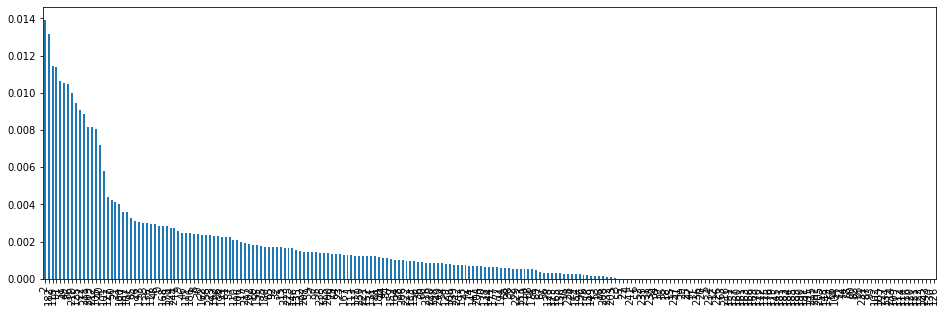

In [102]:
mi.plot.bar(figsize =(16,5));

In [103]:
sel = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train_unique, y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([  2,  22,  27,  28,  40,  46,  49,  51,  86,  91, 100, 101, 105,
            111, 119, 125, 127, 182, 199, 209, 210, 211, 212],
           dtype='int64')

In [104]:
len(X_train_unique.columns[sel.get_support()])

23

In [105]:
X_train_mi =sel.transform(X_train_unique)
X_test_mi =sel.transform(X_test_unique)

In [106]:
X_train_mi.shape

(16000, 23)

### Buil ML model and compare the Performance

In [107]:
def randomforest(X_train, X_test, y_train, y_test):
    rf= RandomForestClassifier(n_estimators=100 , n_jobs=-1, random_state=0)
    rf.fit(X_train, y_train)
    y_pred =rf.predict(X_test)
    print("Accuracy on test set:")
    print(accuracy_score(y_test, y_pred))

In [108]:
%%time
randomforest(X_train_mi, X_test_mi, y_train, y_test)

Accuracy on test set:
0.9585
Wall time: 1.26 s


In [109]:
%%time
randomforest(X_train, X_test, y_train, y_test)

Accuracy on test set:
0.9585
Wall time: 3.52 s


## Mutual information gain in Regression

In [110]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [111]:
boston =load_boston()

In [112]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [113]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [114]:
y =boston.target

In [115]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [116]:
mi = mutual_info_regression(X_train, y_train)
mi=pd.Series(mi)
mi.index =X_train.columns

In [117]:
mi.sort_values(ascending=False,
    inplace=True)

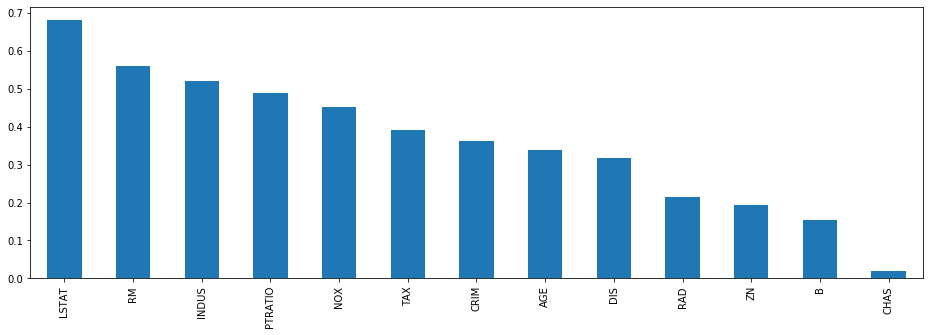

In [118]:
mi.plot.bar(figsize =(16,5));

In [119]:
sel = SelectKBest(mutual_info_regression, k=9 ).fit(X_train, y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [120]:
model =LinearRegression()
model.fit(X_train, y_train)
y_predict =model.predict(X_test)

In [121]:
print(r2_score(y_test, y_predict))
print()
print(np.sqrt(mean_squared_error(y_test, y_predict)))
print()
print(np.std(y))

0.5892223849182507

5.783509315085135

9.188011545278203


In [122]:
X_train9 =sel.transform(X_train)
X_train9.shape

(404, 9)

In [123]:
X_test9 =sel.transform(X_test)
X_test9.shape, y_train.shape

((102, 9), (404,))

In [124]:
model =LinearRegression()
model.fit(X_train9, y_train)
y_predict =model.predict(X_test9)

In [125]:
print(r2_score(y_test, y_predict))
print()
print(np.sqrt(mean_squared_error(y_test, y_predict)))
print()
print(np.std(y))

0.531712760696157

6.175103151293751

9.188011545278203


## 4.Feature Selection Based on Univariate ROC_AUC for Classification

In [126]:
X =data.drop("TARGET", axis=1)
y =data["TARGET"]

X.shape , y.shape

((20000, 370), (20000,))

In [127]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [128]:
X_train_unique =X_train_T[feature_keep].T
X_test_unique =X_test_T[feature_keep].T

In [129]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

In [130]:
roc_auc=[]

for feature in X_train_unique.columns:
    rf= RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train_unique[feature].to_frame(), y_train)
    y_pred =rf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test, y_pred))

In [131]:
print(roc_auc)

[0.5020561820568537, 0.5, 0.5, 0.49986968986187125, 0.501373452866903, 0.49569976544175137, 0.5028068643863192, 0.49986968986187125, 0.5, 0.5, 0.4997393797237425, 0.5017643832812891, 0.49569976544175137, 0.49960906958561374, 0.49895751889497003, 0.49700286682303885, 0.49960906958561374, 0.5021553136956755, 0.4968725566849101, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49986968986187125, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5029371745244479, 0.4959603857180089, 0.5, 0.5048318679438659, 0.4997393797237425, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.49921813917122754, 0.49921813917122754, 0.49824600955181303, 0.5, 0.5, 0.5, 0.4990878290330988, 0.4983763196899418, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [133]:
roc_values =pd.Series(roc_auc)
roc_values.index = X_train_unique.columns
roc_values.sort_values(ascending =False, inplace=True)

In [134]:
roc_values

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
236    0.500000
80     0.500000
89     0.500000
88     0.500000
87     0.500000
86     0.500000
85     0.500000
84     0.500000
83     0.500000
82     0.500000
81     0.500000
78     0.500000
79     0.500000
92     0.500000
77     0.500000
75     0.500000
74     0.500000
72     0.500000
70     0.500000
         ...   
160    0.500000
172    0.500000
7      0.499870
220    0.499870
175    0.499870
76     0.499870
208    0.499870
3      0.499870
10     0.499739
222    0.499739
205    0.499739
108    0.499739
13     0.499609
16     0.499609
212    0.499549
116    0.499218
117    0.499218
209    0.499158
123    0.499088
156    0.499088
14     0.498958
210    0.498827
125    0.498376
119    0.498246
15     0.497003
18     0.496873
211    0.496742
105    0.495960
12     0.495700
5      0.495700
Length: 227, dtype: floa

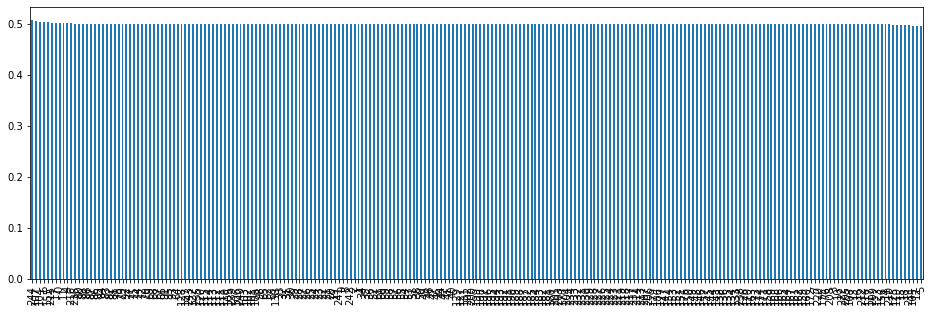

In [137]:
roc_values.plot("bar", figsize=(16,5));

In [136]:
sel =roc_values[roc_values>0.5]
sel

244    0.507660
107    0.504832
104    0.502937
6      0.502807
155    0.502546
215    0.502286
17     0.502155
0      0.502056
11     0.501764
4      0.501373
216    0.501243
dtype: float64

In [138]:
X_train_roc =X_train_unique[sel.index]
X_test_roc =X_test_unique[sel.index]

### Build the Model compare the Performance

In [139]:
def randomforest(X_train, X_test, y_train, y_test):
    rf= RandomForestClassifier(n_estimators=100 , n_jobs=-1, random_state=0)
    rf.fit(X_train, y_train)
    y_pred =rf.predict(X_test)
    print("Accuracy on test set:")
    print(accuracy_score(y_test, y_pred))

In [140]:
%%time
randomforest(X_train_roc, X_test_roc, y_train, y_test)

Accuracy on test set:
0.95275
Wall time: 1.45 s


### Build the model for Regression

In [142]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [144]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [148]:
mse=[]

for feature in X_train.columns:
    rf= RandomForestRegressor(n_estimators=100, random_state=0)
    rf.fit(X_train[feature].to_frame(), y_train)
    y_pred =rf.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test, y_pred))

In [149]:
print(mse)

[105.47529324509806, 81.98329842499291, 73.41245167963781, 79.38523243147068, 56.71110579543794, 51.60604062546083, 128.45358940019108, 94.79097254216386, 77.42899489936768, 77.59588848560087, 73.03299884580784, 100.31147955443087, 39.77619963052769]


In [150]:
mse_values =pd.Series(mse)
mse_values.index = X_train.columns
mse_values.sort_values(ascending =False, inplace=True)

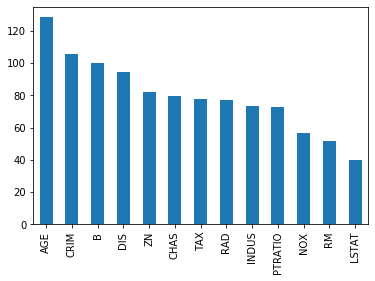

In [153]:
mse_values.plot("bar");

In [161]:
X_train2 = X_train[["RM","LSTAT"]]
X_test2 = X_test[["RM","LSTAT"]]

In [162]:
model =LinearRegression()
model.fit(X_train2, y_train)
y_predict =model.predict(X_test2)

In [163]:
len(y_predict)

102

In [164]:
print(r2_score(y_test, y_predict))
print()
print(np.sqrt(mean_squared_error(y_test, y_predict)))
print()
print(np.std(y))

0.5409084827186417

6.114172522817782

9.188011545278203


## 5. Feature Selection Based on Univariate ANOVA Test for Classification

In [165]:
X =data.drop("TARGET", axis=1)
y =data["TARGET"]

X.shape , y.shape

((20000, 370), (20000,))

In [166]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [167]:
X_train_unique =X_train_T[feature_keep].T
X_test_unique =X_test_T[feature_keep].T

In [168]:
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

### F -Test

In [172]:
from sklearn.feature_selection import f_classif

In [173]:
sel =f_classif(X_train_unique, y_train)
sel

(array([3.42911520e-01, 1.22929093e+00, 1.61291330e+02, 4.01025132e-01,
        8.37661151e-01, 2.39279390e-03, 4.41633351e-02, 1.36337510e-01,
        1.84647123e+00, 2.03640367e+00, 7.98057954e-03, 1.14063993e+00,
        6.32266614e-03, 1.55626237e+01, 1.53553790e+01, 1.28615978e+01,
        1.61834746e+01, 1.59638013e+01, 1.21977511e+01, 9.03776687e-02,
        1.00443179e+00, 1.53946148e+01, 2.50428951e+02, 2.98696944e+01,
        1.06266841e+01, 2.63630437e+01, 1.66417611e+01, 3.13699473e+01,
        2.47256550e+01, 2.60021376e+01, 3.26742018e+01, 9.94259060e+00,
        1.48208220e+01, 1.50040146e+01, 1.34739830e+01, 7.03118653e+00,
        1.36234772e+01, 7.95962134e+00, 3.15161070e+02, 1.79631284e+00,
        1.66910747e+00, 1.21138302e+01, 1.10928892e+01, 1.00443179e+00,
        2.31851572e+00, 8.93973153e+01, 7.53868668e+00, 2.38490562e+02,
        2.98696944e+01, 1.06266841e+01, 2.61694409e+01, 1.66053267e+01,
        2.93013259e+01, 2.44433356e+01, 2.60021376e+01, 5.596238

In [174]:
p_values =pd.Series(sel[1])
p_values.index =X_train_unique.columns
p_values.sort_values(ascending =False, inplace=True)

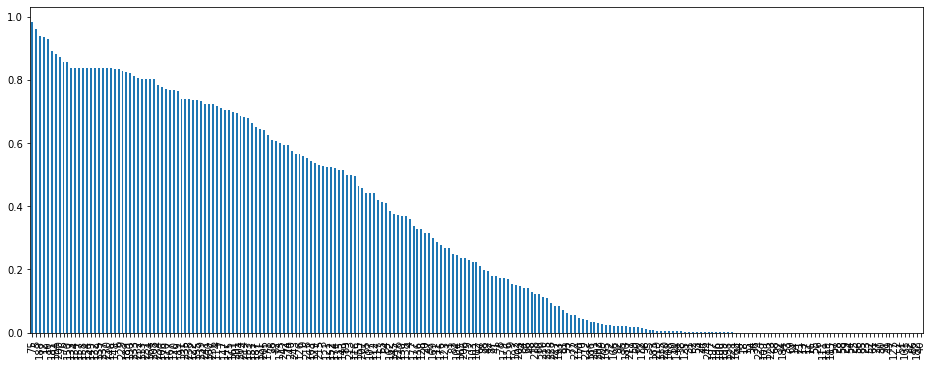

In [177]:
p_values.plot("bar", figsize=(16,6));

In [179]:
p_values =p_values[p_values<0.05]

In [183]:
p_values.index

Int64Index([110,  70, 212, 186, 211, 202, 209, 105,  72, 166,  92,  95, 180,
            217,  59,  60, 172,  98,  35, 183, 219, 115, 220, 108,  50, 144,
             38, 125,  31,  62,  53,  24,  46, 244, 197, 196, 100, 199, 198,
            221, 168,  44,  18,  15,  34,  36, 224, 109, 178, 223,  68,  32,
            184,  33,  69,  14,  21,  13,  17,  16,  55,  26, 111, 119, 185,
             57,  28,  58,  29,  54,  25,  56,  85,  23,  52,  61,  27,  30,
             91,  49, 127,   2,  51, 101,  22,  86, 182,  40],
           dtype='int64')

In [185]:
X_trainp = X_train_unique[p_values.index]
X_testp = X_test_unique[p_values.index]

### Build the Classifier model

In [188]:
def randomforest(X_train, X_test, y_train, y_test):
    rf= RandomForestClassifier(n_estimators=100 , n_jobs=-1, random_state=0)
    rf.fit(X_train, y_train)
    y_pred =rf.predict(X_test)
    print("Accuracy on test set:")
    print(accuracy_score(y_test, y_pred))

In [189]:
%%time
randomforest(X_trainp, X_testp, y_train, y_test)

Accuracy on test set:
0.9525
Wall time: 2.11 s


## 6. Feature Selection using Fisher Score and Chi2 (χ2) Test 

In [11]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [5]:
titanic = sns.load_dataset("titanic")

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
titanic.shape

(891, 15)

In [10]:
titanic.drop(["deck", "age"], axis=1, inplace=True)

In [12]:
titanic =titanic.dropna()

In [13]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [14]:
cols=titanic.select_dtypes(exclude=['int64', 'float64']).columns

In [15]:
le = LabelEncoder()

for i in cols:
    titanic[i] =le.fit_transform(titanic[i])
titanic.head() 

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,0,0,8.0500,2,2,1,1,2,0,1


In [16]:
data = titanic[["pclass", "sex", "sibsp", "parch", "embarked", "who", "alone"]]

In [17]:
X = data.copy()
y = titanic['survived']

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X.shape, y.shape

((889, 7), (889,))

In [20]:
f_score =chi2(X_train,y_train)
f_score

(array([22.65169202, 82.41541237,  0.52934285, 10.35663782, 10.00208066,
        23.40816721, 13.4382363 ]),
 array([1.94189138e-06, 1.10290444e-19, 4.66883271e-01, 1.29009955e-03,
        1.56363463e-03, 1.31021087e-06, 2.46547298e-04]))

In [24]:
p_values =pd.DataFrame(f_score[1], ind ex=X_train.columns)

In [31]:
p_values.sort_values(by=0, ascending=True, inplace=True)

In [32]:
p_values

,0
sex,1.102904e-19
who,1.310211e-06
pclass,1.941891e-06
alone,2.465473e-04
parch,1.290100e-03
embarked,1.563635e-03
sibsp,4.668833e-01


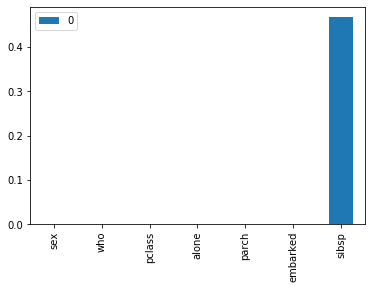

In [34]:
p_values.plot.bar()

In [35]:
X_train2 =X_train[["sex","who"]]
X_test2 =X_test[["sex","who"]]

In [36]:
def randomforest(X_train, X_test, y_train, y_test):
    rf= RandomForestClassifier(n_estimators=100 , n_jobs=-1, random_state=0)
    rf.fit(X_train, y_train)
    y_pred =rf.predict(X_test)
    print("Accuracy on test set:", accuracy_score(y_test, y_pred))

In [37]:
%%time
randomforest(X_train2, X_test2, y_train, y_test)

Accuracy on test set: 0.7191011235955056
Wall time: 301 ms


In [38]:
X_train3 =X_train[["sex","who", "pclass"]]
X_test3 =X_test[["sex","who", "pclass"]]

In [42]:
%%time
randomforest(X_train3, X_test3, y_train, y_test)

Accuracy on test set: 0.7528089887640449
Wall time: 384 ms


In [44]:
X_train4 =X_train[["sex","who", "pclass", "alone"]]
X_test4 =X_test[["sex","who", "pclass", "alone"]]

In [45]:
%%time
randomforest(X_train4, X_test4, y_train, y_test)

Accuracy on test set: 0.7528089887640449
Wall time: 421 ms


In [46]:
X_train5 =X_train[["sex","who", "pclass", "alone", "parch"]]
X_test5 =X_test[["sex","who", "pclass", "alone", "parch"]]

In [47]:
%%time
randomforest(X_train5, X_test5, y_train, y_test)

Accuracy on test set: 0.7415730337078652
Wall time: 408 ms
